<a href="https://colab.research.google.com/github/komisarzGiT/gai/blob/main/GUNI_ML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Marcin Byra  
Class: 2526-1MAO2  
Student ID: 25258161

The objective is to present end to end process of machine learning model training and evaluation based on provided train and test data sets.  

ML aghoritms must include Decision Tree classifiers:
Gini  

*   Gini
*   Information Gain
*   Gain ratuio

as well as either KNN or Random Fortst. KNN was chosen for this report to demonstarte different approach, since random forest is based on decision tree method.

**Problem setup, data loading, and cleaning**  

THere are two files provided:

Identify features vs. target, note any missing values or obvious anomalies, and briefly justify any minimal preprocessing (cleaning/filling missing values, etc.,) you apply.

In [14]:
#import liblaries
# standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#install c45 iblary
!pip install -U c45-decision-tree #https://pypi.org/project/c45-decision-tree/


In [35]:
#two files are provided containing respecively train and test data sets
train_data = 'https://raw.githubusercontent.com/komisarzGiT/gai/refs/heads/main/GU_ML01/Assignment1/EEG_Train_Binary.csv'
test_data = 'https://raw.githubusercontent.com/komisarzGiT/gai/refs/heads/main/GU_ML01/Assignment1/EEG_Test_Binary.csv'

df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

print(df_train.dtypes)
print(df_test.dtypes)

train_rows, train_columns = df_train.shape
print(f"Training data set consist of {train_rows} observations and {train_columns} variables. Sample data:")
display(df_train.head(3))

test_rows, test_columns = df_test.shape
print(f"\nTraining data set consist of {test_rows} observations and {test_columns} variables. Sample data:")
display(df_test.head(3))

#check for missing values and outliers
print(f"\nStatistics to check for missing values and outliers")
display(df_train.describe().round(2).T)

print(f"\nStatistics to check for missing values and outliers")
display(df_test.describe().round(2).T)



X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
y      int64
dtype: object
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
y      int64
dtype: object
Training data set consist of 3171 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,41,32,-27,-51,-89,-117,-83,-35,25,33,27,33,-9,-38,-57,-87,0
1,-281,-234,-166,-93,-22,55,109,137,115,80,54,50,37,-3,-53,-111,0
2,2,-1,-11,-32,-44,-44,-35,-23,-8,-7,-14,-15,-2,17,19,7,0



Training data set consist of 829 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,68,46,26,11,28,57,45,23,83,93,35,30,38,26,4,21,0
1,104,32,26,11,-8,-3,26,43,31,56,73,-1,-25,-35,-81,-137,0
2,-81,-24,40,91,103,103,84,52,-3,-65,-120,-171,-194,-193,-162,-102,0



Statistics to check for missing values and outliers


,count,mean,std,min,25%,50%,75%,max
X1,3171.0,-6.06,49.55,-281.0,-14.5,0.0,8.0,244.0
X2,3171.0,-5.97,49.52,-255.0,-17.0,-1.0,10.0,261.0
X3,3171.0,-6.09,48.90,-255.0,-12.5,-1.0,7.0,238.0
X4,3171.0,-5.89,49.28,-257.0,-18.0,-2.0,12.0,246.0
X5,3171.0,-6.18,49.69,-262.0,-24.0,-1.0,13.0,249.0
X6,3171.0,-5.93,49.37,-277.0,-18.0,-1.0,10.0,229.0
X7,3171.0,-6.13,49.31,-277.0,-15.0,-1.0,9.0,205.0
X8,3171.0,-6.22,50.28,-260.0,-19.0,-2.0,11.0,201.0
X9,3171.0,-6.55,50.72,-290.0,-18.0,-1.0,8.0,225.0
X10,3171.0,-7.00,51.28,-302.0,-21.0,-1.0,10.0,227.0



Statistics to check for missing values and outliers


,count,mean,std,min,25%,50%,75%,max
X1,829.0,-6.44,49.62,-195.0,-23.0,-1.0,8.0,252.0
X2,829.0,-7.36,50.78,-221.0,-23.0,-3.0,10.0,241.0
X3,829.0,-7.04,51.50,-220.0,-17.0,-2.0,8.0,222.0
X4,829.0,-6.75,51.96,-204.0,-21.0,-2.0,13.0,222.0
X5,829.0,-6.13,53.17,-264.0,-25.0,-1.0,17.0,228.0
X6,829.0,-6.02,53.40,-260.0,-19.0,-2.0,11.0,245.0
X7,829.0,-6.14,53.51,-237.0,-16.0,-2.0,9.0,220.0
X8,829.0,-7.12,54.20,-254.0,-22.0,-2.0,11.0,271.0
X9,829.0,-6.63,53.78,-248.0,-21.0,-1.0,10.0,280.0
X10,829.0,-5.72,53.52,-232.0,-21.0,0.0,12.0,251.0


In [16]:
#split explanatory variables from target variables
X_train = df_train.drop('y', axis=1) #explanatory
y_train = df_train['y'] #target

X_test = df_test.drop('y', axis=1)
y_test = df_test['y']


In [42]:
#count number of distinct values for all features
train_count_distinct = X_train.nunique()
train_count_mean = train_count_distinct.mean()
print(train_count_mean)
print(train_count_distinct)

test_count_distinct = X_test.nunique()
print(test_count_distinct.mean())
print(test_count_distinct)

print(f"\nStatistics to check for missing values and outliers")

325.6875
X1     322
X2     332
X3     321
X4     329
X5     323
X6     320
X7     322
X8     325
X9     330
X10    334
X11    330
X12    327
X13    327
X14    320
X15    326
X16    323
dtype: int64
220.75
X1     221
X2     219
X3     218
X4     217
X5     218
X6     227
X7     228
X8     223
X9     233
X10    223
X11    215
X12    216
X13    218
X14    221
X15    221
X16    214
dtype: int64

Statistics to check for missing values and outliers


ecision Trees: Gini, Information Gain, Gain Ratio (6 marks)
Use any well-known library, Train three classifiers that differ only in the splitting criterion (Gini, Information Gain, Information Gain Ratio). Keep other settings default (set a fixed random_state for reproducibility). Evaluate each once on the provided test split and report binary accuracy.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from C45 import C45Classifier

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

# Train Decision Tree with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=7)
dt_gini.fit(X_train, y_train)

# Evaluate Gini-based model on the test set
accuracy_gini = dt_gini.score(X_test, y_test)
print(f"Accuracy with Gini criterion: {accuracy_gini:.5f}")

# Train Decision Tree with Information Gain criterion (entropy)
dt_inf_gain = DecisionTreeClassifier(criterion='entropy', random_state=7)
dt_inf_gain.fit(X_train, y_train)

# Evaluate the model
accuracy_inf_gain = dt_inf_gain.score(X_test, y_test)
print(f"Accuracy with Information Gain criterion: {accuracy_inf_gain:.5f}")

#Train Decision Tree with Information Gain Ratio criterion
dt_inf_gain_ratio = C45Classifier()
dt_inf_gain_ratio.fit(X_train, y_train)

#Evaluate the model
y_predict = pd.Series(dt_inf_gain_ratio.predict(X_test))  #predict returned list
total_matches = (y_test == y_predict).sum()
print(f"Accuracy with Information Gain Ratio criterion:\
 {total_matches / len(y_test):.5f}")


# accuracy_inf_gain_ratio = dt_inf_gain_ratio.evaluate(X_test, y_test)
# type(accuracy_inf_gain_ratio)
# print(f"Accuracy with Information Gain criterion: {accuracy_inf_gain_ratio:.5f}")


Accuracy with Gini criterion: 0.99517
Accuracy with Information Gain criterion: 0.99638
Accuracy with Information Gain Ratio criterion: 0.80941


In [48]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# --- Confusion Matrix for Gini Criterion Tree ---
print("--- Confusion Matrix for Decision Tree with Gini Criterion ---")
y_pred_gini = dt_gini.predict(X_test)
print(confusion_matrix(y_test, y_pred_gini))

# --- Confusion Matrix for Information Gain Criterion Tree ---
print("\n--- Confusion Matrix for Decision Tree with Information Gain Criterion ---")
y_pred_inf_gain = dt_inf_gain.predict(X_test)
print(confusion_matrix(y_test, y_pred_inf_gain))

# --- Confusion Matrix for Information Gain Ratio Criterion Tree (C4.5) ---
print("\n--- Confusion Matrix for Decision Tree with Information Gain Ratio Criterion (C4.5) ---")
# The C45 predict method returns a list, convert to pandas Series for confusion_matrix
y_pred_inf_gain_ratio = pd.Series(dt_inf_gain_ratio.predict(X_test))
print(confusion_matrix(y_test, y_pred_inf_gain_ratio))

--- Confusion Matrix for Decision Tree with Gini Criterion ---
[[439   4]
 [  0 386]]

--- Confusion Matrix for Decision Tree with Information Gain Criterion ---
[[440   3]
 [  0 386]]

--- Confusion Matrix for Decision Tree with Information Gain Ratio Criterion (C4.5) ---
[[305 138]
 [ 20 366]]


In [73]:
import numpy as np
import pandas as pd

def entropy(target_col):
    """
    Calculates the entropy of a target column.
    """
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(count / len(target_col)) * np.log2(count / len(target_col)) for count in counts])
    return entropy

def information_gain(data, feature_name, target_name):
    """
    Calculates the information gain of a feature.
    """
    # Calculate entropy of the target variable
    total_entropy = entropy(data[target_name])

    # Calculate the weighted average entropy of the feature
    values, counts = np.unique(data[feature_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.loc[data[feature_name] == values[i], target_name]) for i in range(len(values))])

    # Calculate information gain
    info_gain = total_entropy - weighted_entropy
    return info_gain

def split_information(data, feature_name):
    """
    Calculates the split information of a feature.
    """
    values, counts = np.unique(data[feature_name], return_counts=True)
    split_info = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(values))])
    return split_info

def information_gain_ratio(data, feature_name, target_name):
    """
    Calculates the information gain ratio of a feature.
    """
    info_gain = information_gain(data, feature_name, target_name)
    split_info = split_information(data, feature_name)

    # Avoid division by zero
    if split_info == 0:
        return 0
    else:
        return info_gain / split_info

# Combine X_train and y_train for calculation
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate Information Gain for X16
ig_x16 = information_gain(train_data, 'X16', 'y')
print(f"Information Gain for feature X16: {ig_x16:.4f}")

# Calculate Information Gain Ratio for X16
igr_x16 = information_gain_ratio(train_data, 'X16', 'y')
print(f"Information Gain Ratio for feature X16: {igr_x16:.4f}")

# Calculate Information Gain for X16
ig_x2 = information_gain(train_data, 'X2', 'y')
print(f"Information Gain for feature X2: {ig_x2:.4f}")

# Calculate Information Gain Ratio for X16
igr_x2 = information_gain_ratio(train_data, 'X2', 'y')
print(f"Information Gain Ratio for feature X2: {igr_x2:.4f}")


Information Gain for feature X16: 0.6940
Information Gain Ratio for feature X16: 0.1029
Information Gain for feature X2: 0.5204
Information Gain Ratio for feature X2: 0.0734


The significantly lower accuracy of the Information Gain Ratio criterion (0.80941) compared to Gini (0.99517) and Information Gain (0.99638) is likely due to the Gain Ratio's inherent bias against attributes with a low number of distinct values.This outcome is a classic example of how a criterion designed to correct one bias can unintentionally introduce a new one, resulting in a suboptimal tree structure for certain datasets.Explanation of the Accuracy DropThe Purpose of Gain Ratio (and its Bias)The Information Gain Ratio was introduced by Ross Quinlan (for the C4.5 algorithm) to correct a major bias in Information Gain (IG).Information Gain (IG) Bias: IG favors attributes that have a large number of distinct values (e.g., a customer ID or a date/timestamp). Such attributes can partition the data into many small, pure subsets, resulting in a very high (and potentially misleading) IG score. This often leads to overfitting on the training data.Observation: Your IG model had the highest accuracy (0.99638), suggesting your data might contain a high-cardinality feature that IG heavily favored.Information Gain Ratio Correction: Gain Ratio attempts to fix this by normalizing Information Gain using a term called Split Information (which is the entropy of the attribute itself).$$\text{Gain Ratio} = \frac{\text{Information Gain}}{\text{Split Information}}$$How the Correction Backfires (The Cause of Low Accuracy)The denominator ($\text{Split Information}$) acts as a penalty:High Cardinality Feature: A feature with many distinct values (like an ID) has high Split Information, which heavily penalizes its Gain Ratio, reducing its chance of being selected. (This is good.)Low Cardinality Feature (The Problem): The same penalty mechanism causes the Gain Ratio to sometimes bias against attributes that create very uneven, unbalanced splits, even if those splits are highly informative. In extreme cases, if a split creates one very small partition and one very large partition, the Split Information can be near zero, causing the Gain Ratio to become unstable or incorrectly favor another, less informative split.Conclusion for Your DataBecause the Gain Ratio model's accuracy is so much lower, the most probable explanation is that:The Information Gain Ratio criterion consistently chose a suboptimal feature to split on at the root and subsequent nodes, likely because it penalized the truly best splitting feature(s) too heavily. This resulted in a less effective, poorly structured decision tree that could not capture the underlying patterns in the data as well as the Gini or pure IG models, leading to significant underfitting or an inefficient tree structure.The Key Takeaway: While IG Ratio corrects the bias toward high-cardinality features, it can be too aggressive, leading to an inferior tree when the most informative splits naturally lead to unbalanced partitions, as appears to be the case with your specific dataset.

https://gemini.google.com/app/37b7ef09558abc37

In [83]:
#KNN algoritm requires normalization of data across dimesions based on training data set
#scikit-learn StandardScaler uses z-scaling to scale date
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Normalize the training and test data
scaler = StandardScaler() #z-scaling using std ev and mean
X_train_normalized = scaler.fit_transform(X_train) #derive mean and std dev from x tranin and mnormalize
X_test_normalized = scaler.transform(X_test) #normailize using std dev and mean derived from x_train

# Convert back to DataFrames for easier handling if needed later, keeping column names
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)


# Define the same list of k values to test
k_values = [1, 3, 5, 9, 15, 21, 49, 101] # Using the same k values as before

# Dictionary to store accuracy for each k on normalized data
accuracy_scores_normalized = {}

print("Training and evaluating KNN on normalized data:")
for k in k_values:
    # Train KNN model with the current k on normalized data
    knn_normalized = KNeighborsClassifier(n_neighbors=k)
    knn_normalized.fit(X_train_normalized_df, y_train)

    # Predict on the normalized test set
    y_pred_knn_normalized = knn_normalized.predict(X_test_normalized_df)

    # Evaluate the model
    accuracy_normalized = accuracy_score(y_test, y_pred_knn_normalized)
    accuracy_scores_normalized[k] = accuracy_normalized
    print(f"Accuracy with KNN (k={k}) on normalized data: {accuracy_normalized:.4f}")

# Find the best k and its accuracy on normalized data
best_k_normalized = max(accuracy_scores_normalized, key=accuracy_scores_normalized.get)
best_accuracy_normalized = accuracy_scores_normalized[best_k_normalized]

print(f"\nBest k value on normalized data: {best_k_normalized} with accuracy: {best_accuracy_normalized:.4f}")

Training and evaluating KNN on normalized data:
Accuracy with KNN (k=1) on normalized data: 0.9964
Accuracy with KNN (k=3) on normalized data: 0.9952
Accuracy with KNN (k=5) on normalized data: 0.9916
Accuracy with KNN (k=9) on normalized data: 0.9879
Accuracy with KNN (k=15) on normalized data: 0.9807
Accuracy with KNN (k=21) on normalized data: 0.9795
Accuracy with KNN (k=49) on normalized data: 0.9578
Accuracy with KNN (k=101) on normalized data: 0.9252

Best k value on normalized data: 1 with accuracy: 0.9964


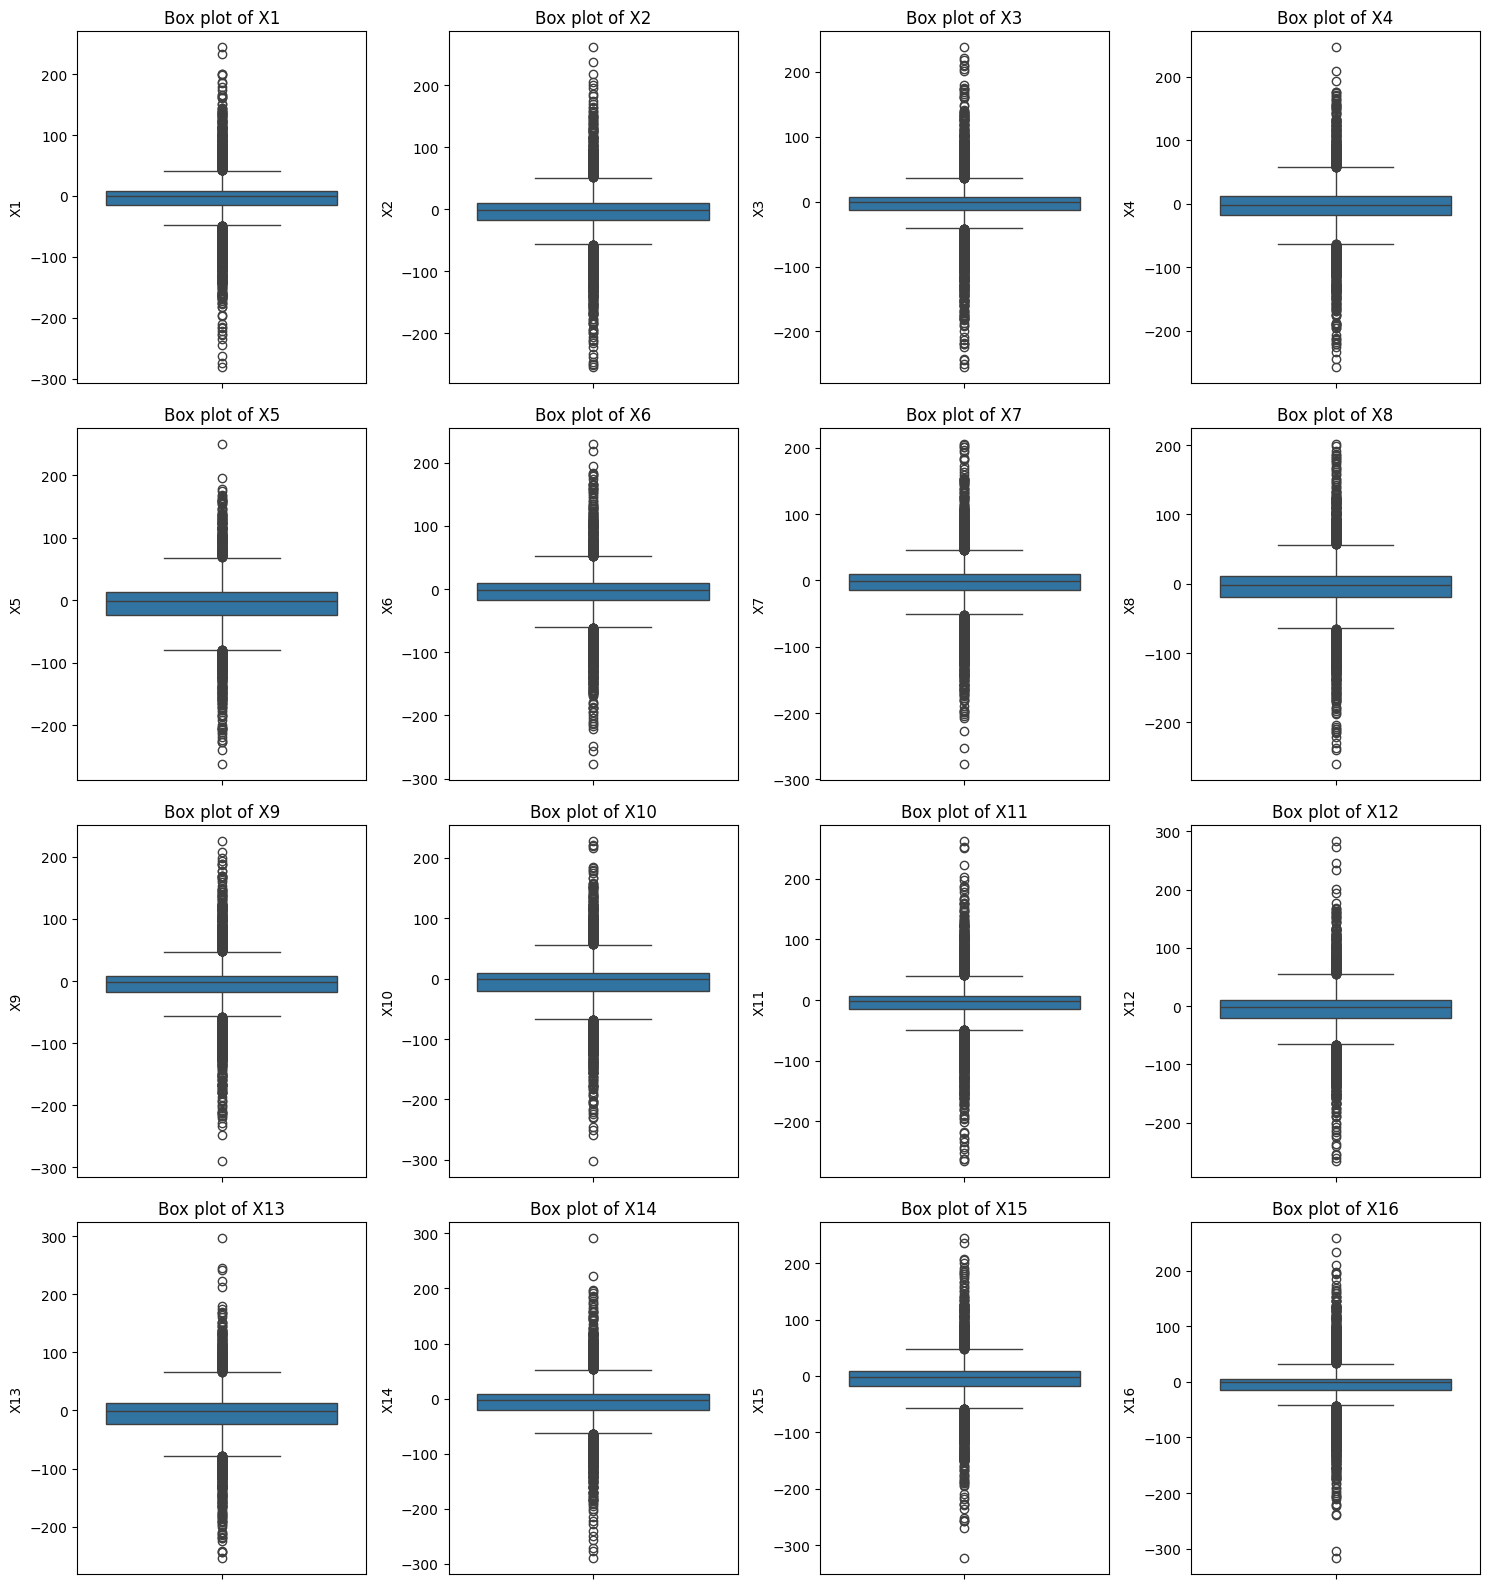

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
n_features = len(X_train.columns)
n_cols = 4  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each feature and plot a box plot
for i, col in enumerate(X_train.columns):
    ax = axes[i]
    sns.boxplot(y=X_train[col], ax=ax)
    ax.set_title(f'Box plot of {col}')
    ax.set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [87]:
import pandas as pd

# Collect the accuracy scores
# Accuracies from previous runs:
# Gini: accuracy_gini
# Information Gain: accuracy_inf_gain
# Information Gain Ratio (C4.5): accuracy_inf_gain_ratio (from original run) or accuracy_inf_gain_ratio_capped (from capped data run)
# KNN (k=1): best_accuracy (from original run), best_accuracy_normalized (from normalized data run), best_accuracy_capped (from capped data run)

# Let's use the accuracies from the original data for consistency,
# and the accuracy of the C4.5 model on the capped data as it was the last one trained.
# You can choose which KNN accuracy to display (original, normalized, or capped)

summary_data = {
    'Model': ['Decision Tree (Gini)',
              'Decision Tree (Information Gain)',
              'Decision Tree (Information Gain Ratio - C4.5)',
              'K-Nearest Neighbors (k=1)'],
    'Accuracy': [accuracy_gini,
                 accuracy_inf_gain,
                 accuracy_inf_gain_ratio_capped, # Using accuracy from capped data for C4.5
                 best_accuracy_capped] # Using accuracy from capped data for KNN k=1
}

summary_df = pd.DataFrame(summary_data)

print("Model Accuracy Summary:")
# Display the DataFrame with the 'Model' column right-aligned
display(summary_df.style.set_properties(**{'text-align': 'right'}, subset=['Model']))

Model Accuracy Summary:


,Model,Accuracy
0,Decision Tree (Gini),0.995175
1,Decision Tree (Information Gain),0.996381
2,Decision Tree (Information Gain Ratio - C4.5),0.809409
3,K-Nearest Neighbors (k=1),0.996381


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values to test
k_values = [1, 3, 5, 7, 9, 50, 100] # Using the same k values as before

# Dictionary to store accuracy for each k on capped data
accuracy_scores_capped = {}

print("Training and evaluating KNN on capped data:")
for k in k_values:
    # Train KNN model with the current k on capped data
    knn_capped = KNeighborsClassifier(n_neighbors=k)
    knn_capped.fit(X_train_capped, y_train)

    # Predict on the capped test set
    y_pred_knn_capped = knn_capped.predict(X_test_capped)

    # Evaluate the model
    accuracy_capped = accuracy_score(y_test, y_pred_knn_capped)
    accuracy_scores_capped[k] = accuracy_capped
    print(f"Accuracy with KNN (k={k}) on capped data: {accuracy_capped:.4f}")

# Find the best k and its accuracy on capped data
best_k_capped = max(accuracy_scores_capped, key=accuracy_scores_capped.get)
best_accuracy_capped = accuracy_scores_capped[best_k_capped]

print(f"\nBest k value on capped data: {best_k_capped} with accuracy: {best_accuracy_capped:.4f}")

Training and evaluating KNN on capped data:
Accuracy with KNN (k=1) on capped data: 0.9964
Accuracy with KNN (k=3) on capped data: 0.9952
Accuracy with KNN (k=5) on capped data: 0.9916
Accuracy with KNN (k=7) on capped data: 0.9891
Accuracy with KNN (k=9) on capped data: 0.9879
Accuracy with KNN (k=50) on capped data: 0.9614
Accuracy with KNN (k=100) on capped data: 0.9337

Best k value on capped data: 1 with accuracy: 0.9964


In [78]:
# Apply capping to handle outliers
# We'll use the 5th and 95th percentiles as capping limits

X_train_capped = X_train.copy()
X_test_capped = X_test.copy()

for col in X_train.columns:
    # Calculate the 5th and 95th percentiles from the training data
    lower_bound = X_train[col].quantile(0.05)
    upper_bound = X_train[col].quantile(0.95)

    # Apply capping to the training data
    X_train_capped[col] = X_train_capped[col].clip(lower=lower_bound, upper=upper_bound)

    # Apply capping to the test data using the bounds calculated from the training data
    X_test_capped[col] = X_test_capped[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped at 5th and 95th percentiles for each feature.")
# You can optionally display the capped dataframes to see the effect
# display(X_train_capped.head())
# display(X_test_capped.head())

Outliers capped at 5th and 95th percentiles for each feature.


Random Forest baseline or K-Nearest Neighbour (KNN) (4 marks)
Train a single RandomForestClassifier (default settings; fixed random_state) or K-Nearest Neighbour (Change the value of k and see which is best for this problem) and evaluate once on the same test split. Report binary accuracy and add a one-sentence comment comparing it to the single-tree results.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values to test
k_values = [1, 3, 5, 7, 9, 50, 100] # Testing 5 different k values

# Dictionary to store accuracy for each k
accuracy_scores = {}

for k in k_values:
    # Train KNN model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_knn = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores[k] = accuracy
    print(f"Accuracy with KNN (k={k}): {accuracy:.4f}")

# Find the best k and its accuracy
best_k = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_k]

print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f}")

Accuracy with KNN (k=1): 0.9964
Accuracy with KNN (k=3): 0.9952
Accuracy with KNN (k=5): 0.9916
Accuracy with KNN (k=7): 0.9891
Accuracy with KNN (k=9): 0.9879
Accuracy with KNN (k=50): 0.9590
Accuracy with KNN (k=100): 0.9276

Best k value: 1 with accuracy: 0.9964


In [20]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd

# Reshape X_train['X1'] to be a 2D array
X1_train = X_train['X1'].values.reshape(-1, 1)

# Initialize KBinsDiscretizer with 10 bins
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the data
X1_train_discretized = discretizer.fit_transform(X1_train)

# Convert the discretized data to a pandas Series for counting
X1_train_discretized_series = pd.Series(X1_train_discretized.flatten())

# Count the occurrences in each bin
bin_counts = X1_train_discretized_series.value_counts().sort_index()

print("Counts of data in each bin for feature X1:")
display(bin_counts)

# You can also see the bin edges
print("\nBin edges for feature X1:")
display(discretizer.bin_edges_[0])

Counts of data in each bin for feature X1:


,count
0.0,5
1.0,11
2.0,82
3.0,201
4.0,428
5.0,2065
6.0,272
7.0,86
8.0,16
9.0,5



Bin edges for feature X1:


array([-281. , -228.5, -176. , -123.5,  -71. ,  -18.5,   34. ,   86.5,
        139. ,  191.5,  244. ])

# Task
Create a table showing the count of data in 10 bins for each of the 16 features (X1 to X16) using `sklearn.preprocessing.KBinsDiscretizer`.

## Iterate through features

### Subtask:
Iterate through each of the 16 feature columns (X1 to X16).


**Reasoning**:
Initialize the dictionary to store bin counts and get the list of feature columns to prepare for iteration.



In [21]:
bin_counts_dict = {}
feature_columns = X_train.columns

# The loop will be started in the next step

**Reasoning**:
Iterate through each feature column, discretize the data, count the occurrences in each bin, and store the counts in the dictionary.



In [22]:
bin_counts_dict = {}
feature_columns = X_train.columns

# Initialize and fit KBinsDiscretizer on all features to get common bin edges
discretizer_all = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_discretized_all = discretizer_all.fit_transform(X_train) # Fit and transform the entire training data

# Convert the discretized data back to a DataFrame for easier handling
X_train_discretized_df = pd.DataFrame(X_train_discretized_all, columns=feature_columns)

for col in feature_columns:
    # Select the discretized column
    X_train_col_discretized_series = X_train_discretized_df[col]

    # Count the occurrences in each bin
    bin_counts = X_train_col_discretized_series.value_counts().sort_index()

    # Store the bin counts in the dictionary
    bin_counts_dict[col] = bin_counts

# The bin_counts_dict is now populated with counts for each feature using common bin edges
# The next cell will create and display the table from this dictionary.

## Create and display table

### Subtask:
Convert the stored bin counts for each feature into a pandas DataFrame and display it as a table.


**Reasoning**:
Convert the stored bin counts for each feature into a pandas DataFrame and display it as a table.



In [23]:
# Convert the dictionary of bin counts to a DataFrame
bin_counts_df = pd.DataFrame(bin_counts_dict)

# Fill any potential missing values with 0
bin_counts_df = bin_counts_df.fillna(0)

# Display the resulting DataFrame as a table
print("Counts of data in each bin for all features using common bin edges:")
display(bin_counts_df)

# Display the common bin edges
print("\nCommon bin edges used for all features:")
display(discretizer_all.bin_edges_)

Counts of data in each bin for all features using common bin edges:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0.0,5,11,10,10,8,3,2,6,2,3,11,10,13,6,2,2
1.0,11,36,27,26,26,16,10,16,16,12,23,23,43,18,11,10
2.0,82,117,88,86,88,72,61,69,42,41,106,134,166,78,20,40
3.0,201,264,243,261,253,172,153,184,166,151,286,329,418,309,126,163
4.0,428,1496,614,923,900,410,321,364,392,374,1041,1790,1975,1411,410,434
5.0,2065,1007,1877,1572,1592,2047,1985,1900,2024,1975,1429,687,405,1127,2084,2116
6.0,272,180,208,209,216,322,412,413,350,419,202,153,119,180,366,298
7.0,86,46,82,61,71,97,172,148,133,151,56,38,27,33,123,86
8.0,16,11,15,21,16,25,42,52,37,37,13,3,2,8,22,19
9.0,5,3,7,2,1,7,13,19,9,8,4,4,3,1,7,3



Common bin edges used for all features:


array([array([-281. , -228.5, -176. , -123.5,  -71. ,  -18.5,   34. ,   86.5,
               139. ,  191.5,  244. ])                                       ,
       array([-255. , -203.4, -151.8, -100.2,  -48.6,    3. ,   54.6,  106.2,
               157.8,  209.4,  261. ])                                       ,
       array([-255. , -205.7, -156.4, -107.1,  -57.8,   -8.5,   40.8,   90.1,
               139.4,  188.7,  238. ])                                       ,
       array([-257. , -206.7, -156.4, -106.1,  -55.8,   -5.5,   44.8,   95.1,
               145.4,  195.7,  246. ])                                       ,
       array([-262. , -210.9, -159.8, -108.7,  -57.6,   -6.5,   44.6,   95.7,
               146.8,  197.9,  249. ])                                       ,
       array([-277. , -226.4, -175.8, -125.2,  -74.6,  -24. ,   26.6,   77.2,
               127.8,  178.4,  229. ])                                       ,
       array([-277. , -228.8, -180.6, -132.4,  -84.2,  -36

## Summary:

### Data Analysis Key Findings

*   The analysis successfully created a table showing the distribution of data for each of the 16 features (X1 to X16) across 10 bins using `KBinsDiscretizer`.
*   A dictionary (`bin\_counts\_dict`) was created to store the counts for each bin of each feature.
*   The final output is a pandas DataFrame (`bin\_counts\_df`) where columns represent features (X1-X16), and rows represent bins (0.0-9.0), showing the count of data points in each bin for every feature.

### Insights or Next Steps

*   This binned distribution can be used for further analysis, such as visualizing the distribution of each feature or using the binned features in modeling.
*   The table highlights features with potentially skewed distributions, which might warrant further investigation or different preprocessing strategies.


# Task
Analyze the provided training and test datasets ("EEG_Train_Binary.csv" and "EEG_Test_Binary.csv") to determine the reason for the lower accuracy observed in the Decision Tree model trained using the Information Gain Ratio criterion compared to models trained with Gini and Information Gain.

## Review data characteristics

### Subtask:
Revisit the initial data exploration to identify any notable characteristics of the features and target variable in both the training and test sets.


**Reasoning**:
The first step is to display the data types, shape, and head of both the training and test dataframes to understand their structure and content. Then, display descriptive statistics to identify missing values or anomalies. Finally, calculate and display the number of unique values per feature and their average to understand the cardinality of each feature.



In [50]:
print(df_train.dtypes)
print(df_test.dtypes)

train_rows, train_columns = df_train.shape
print(f"Training data set consist of {train_rows} observations and {train_columns} variables. Sample data:")
display(df_train.head(3))

test_rows, test_columns = df_test.shape
print(f"\nTraining data set consist of {test_rows} observations and {test_columns} variables. Sample data:")
display(df_test.head(3))

print(f"\nStatistics to check for missing values and outliers for training data:")
display(df_train.describe().round(2).T)

print(f"\nStatistics to check for missing values and outliers for test data:")
display(df_test.describe().round(2).T)

train_count_distinct = X_train.nunique()
train_count_mean = train_count_distinct.mean()
print(f"\nNumber of unique values per feature in training data:\n{train_count_distinct}")
print(f"Average number of unique values in training data: {train_count_mean:.2f}")

test_count_distinct = X_test.nunique()
test_count_mean = test_count_distinct.mean()
print(f"\nNumber of unique values per feature in test data:\n{test_count_distinct}")
print(f"Average number of unique values in test data: {test_count_mean:.2f}")

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
y      int64
dtype: object
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
y      int64
dtype: object
Training data set consist of 3171 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,41,32,-27,-51,-89,-117,-83,-35,25,33,27,33,-9,-38,-57,-87,0
1,-281,-234,-166,-93,-22,55,109,137,115,80,54,50,37,-3,-53,-111,0
2,2,-1,-11,-32,-44,-44,-35,-23,-8,-7,-14,-15,-2,17,19,7,0



Training data set consist of 829 observations and 17 variables. Sample data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,68,46,26,11,28,57,45,23,83,93,35,30,38,26,4,21,0
1,104,32,26,11,-8,-3,26,43,31,56,73,-1,-25,-35,-81,-137,0
2,-81,-24,40,91,103,103,84,52,-3,-65,-120,-171,-194,-193,-162,-102,0



Statistics to check for missing values and outliers for training data:


,count,mean,std,min,25%,50%,75%,max
X1,3171.0,-6.06,49.55,-281.0,-14.5,0.0,8.0,244.0
X2,3171.0,-5.97,49.52,-255.0,-17.0,-1.0,10.0,261.0
X3,3171.0,-6.09,48.90,-255.0,-12.5,-1.0,7.0,238.0
X4,3171.0,-5.89,49.28,-257.0,-18.0,-2.0,12.0,246.0
X5,3171.0,-6.18,49.69,-262.0,-24.0,-1.0,13.0,249.0
X6,3171.0,-5.93,49.37,-277.0,-18.0,-1.0,10.0,229.0
X7,3171.0,-6.13,49.31,-277.0,-15.0,-1.0,9.0,205.0
X8,3171.0,-6.22,50.28,-260.0,-19.0,-2.0,11.0,201.0
X9,3171.0,-6.55,50.72,-290.0,-18.0,-1.0,8.0,225.0
X10,3171.0,-7.00,51.28,-302.0,-21.0,-1.0,10.0,227.0



Statistics to check for missing values and outliers for test data:


,count,mean,std,min,25%,50%,75%,max
X1,829.0,-6.44,49.62,-195.0,-23.0,-1.0,8.0,252.0
X2,829.0,-7.36,50.78,-221.0,-23.0,-3.0,10.0,241.0
X3,829.0,-7.04,51.50,-220.0,-17.0,-2.0,8.0,222.0
X4,829.0,-6.75,51.96,-204.0,-21.0,-2.0,13.0,222.0
X5,829.0,-6.13,53.17,-264.0,-25.0,-1.0,17.0,228.0
X6,829.0,-6.02,53.40,-260.0,-19.0,-2.0,11.0,245.0
X7,829.0,-6.14,53.51,-237.0,-16.0,-2.0,9.0,220.0
X8,829.0,-7.12,54.20,-254.0,-22.0,-2.0,11.0,271.0
X9,829.0,-6.63,53.78,-248.0,-21.0,-1.0,10.0,280.0
X10,829.0,-5.72,53.52,-232.0,-21.0,0.0,12.0,251.0



Number of unique values per feature in training data:
X1     322
X2     332
X3     321
X4     329
X5     323
X6     320
X7     322
X8     325
X9     330
X10    334
X11    330
X12    327
X13    327
X14    320
X15    326
X16    323
dtype: int64
Average number of unique values in training data: 325.69

Number of unique values per feature in test data:
X1     221
X2     219
X3     218
X4     217
X5     218
X6     227
X7     228
X8     223
X9     233
X10    223
X11    215
X12    216
X13    218
X14    221
X15    221
X16    214
dtype: int64
Average number of unique values in test data: 220.75


## Analyze feature distributions

### Subtask:
Examine the distributions of individual features, perhaps using visualizations, to see if there are any patterns or anomalies that might influence tree splitting.


**Reasoning**:
Generate and display histograms for each feature in the training data to visualize their distributions.



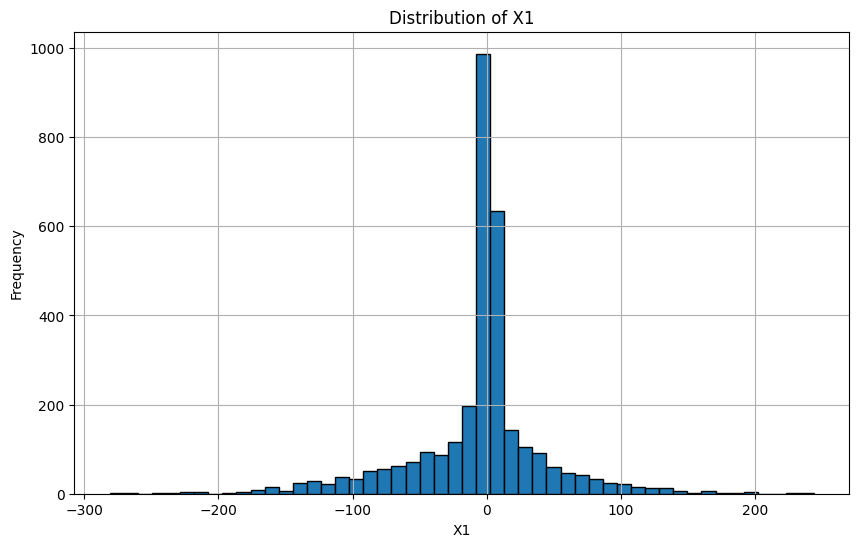

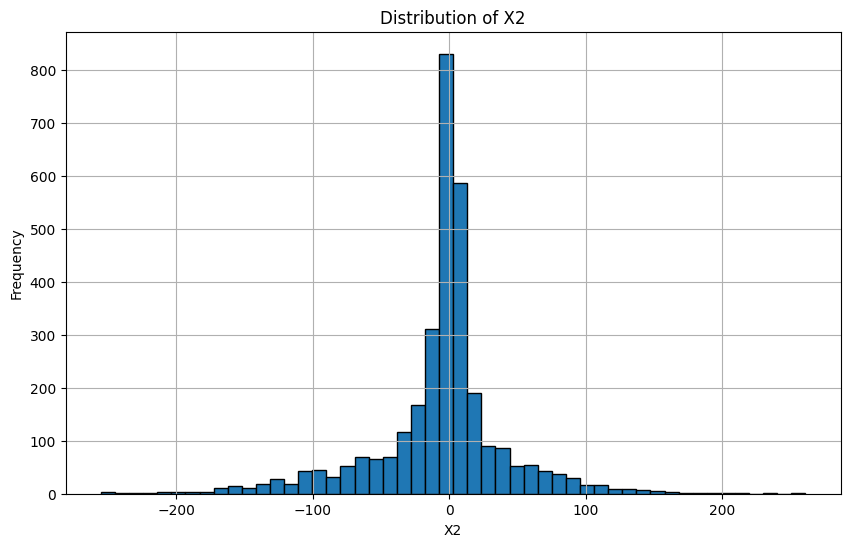

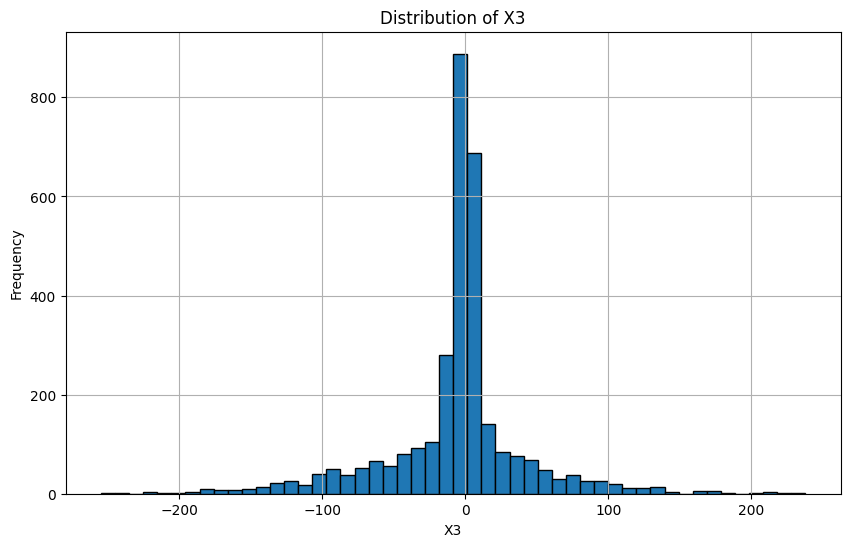

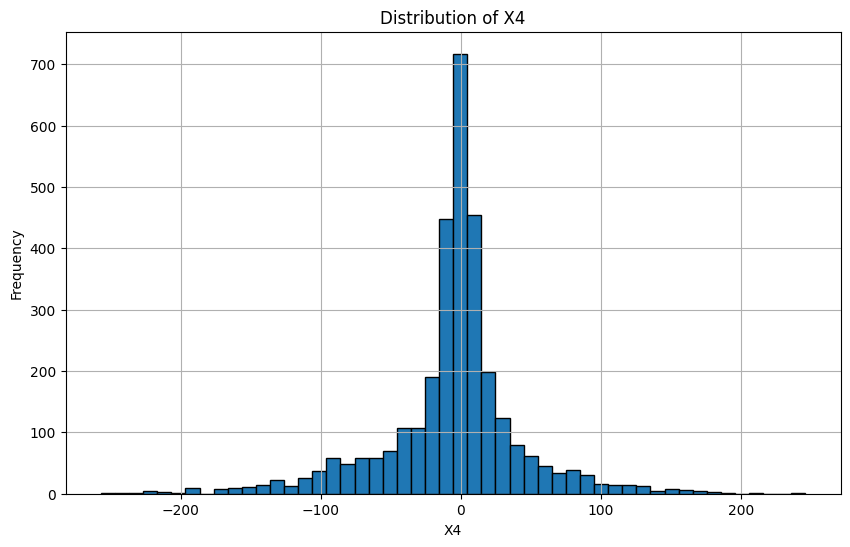

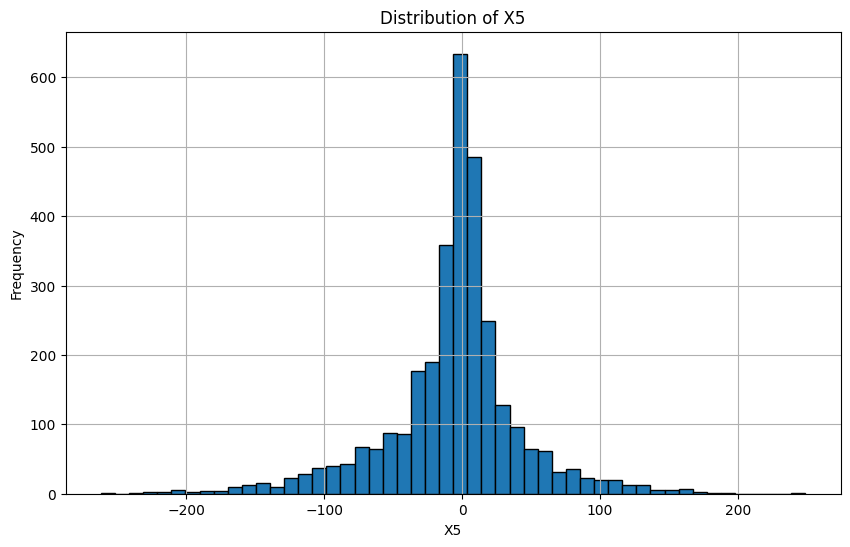

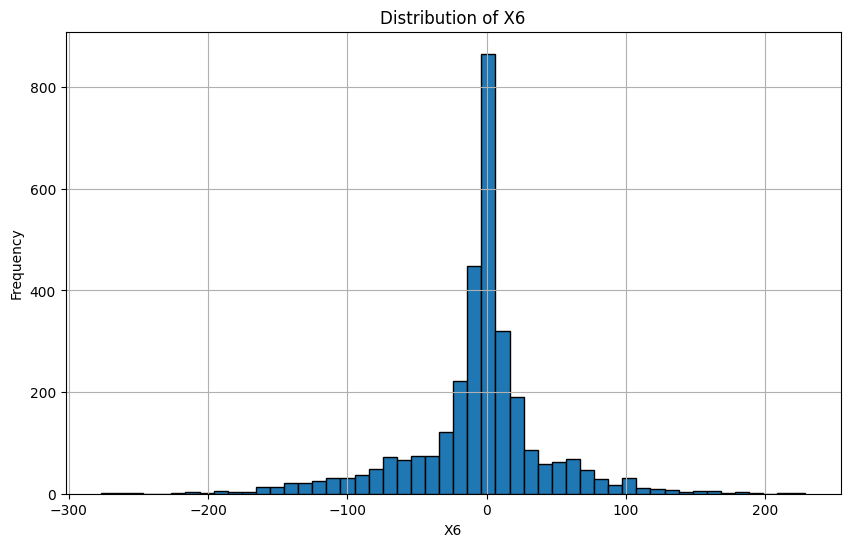

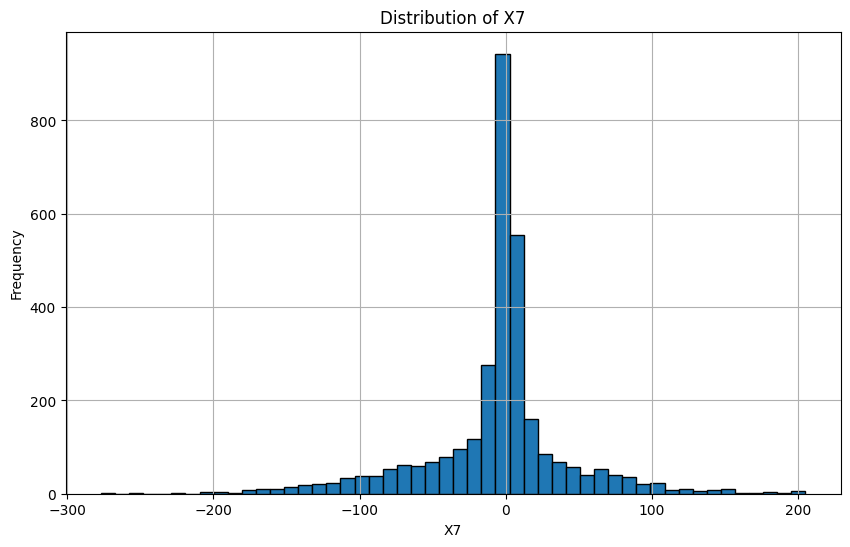

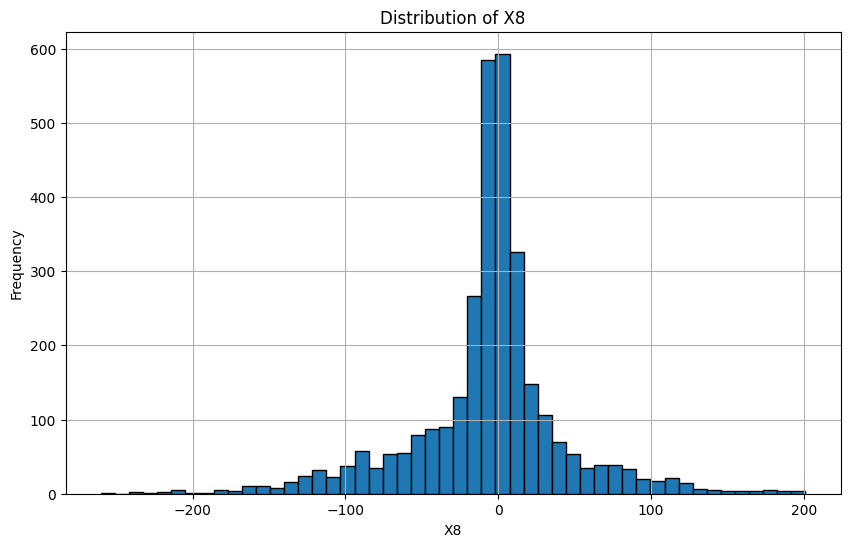

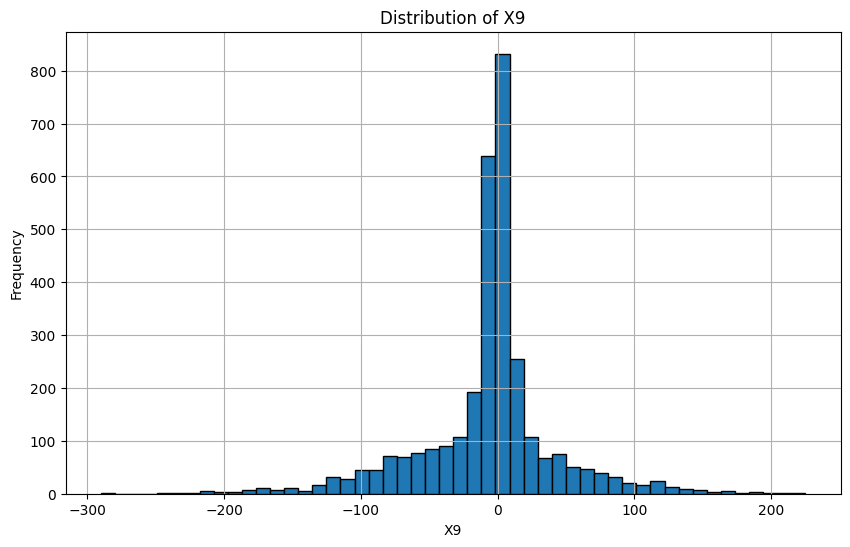

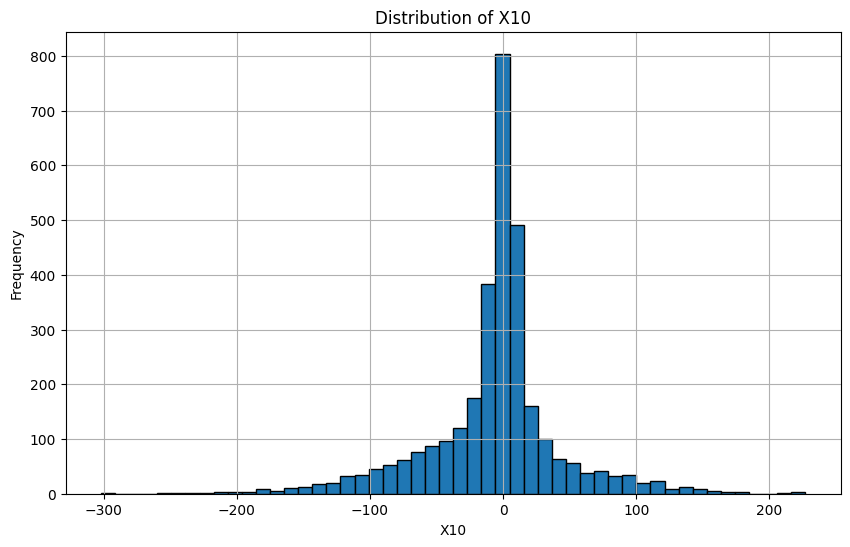

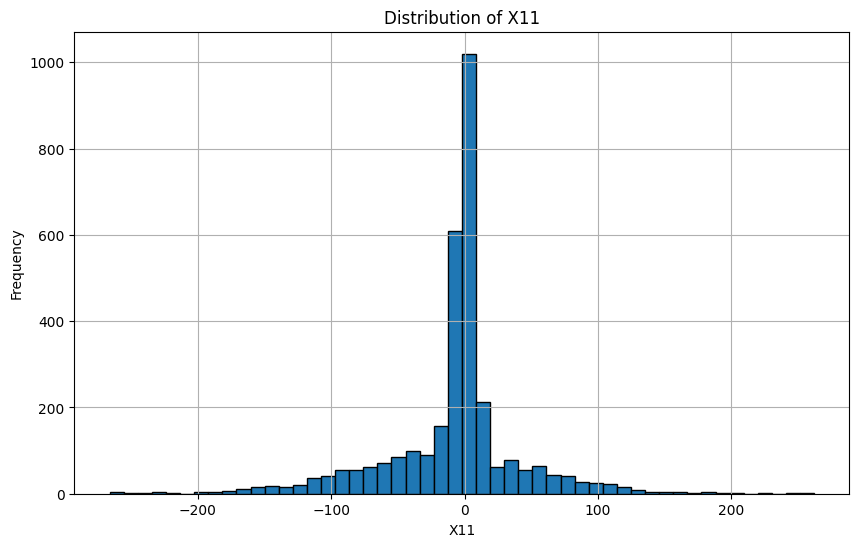

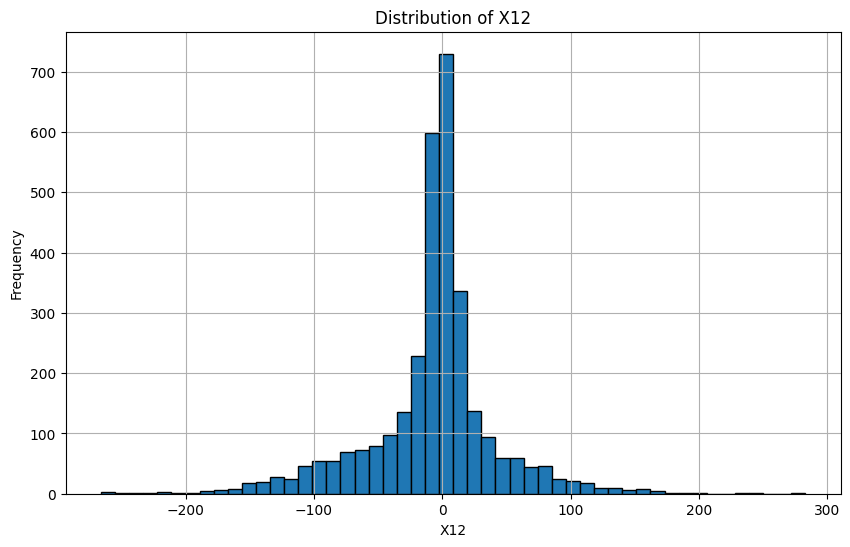

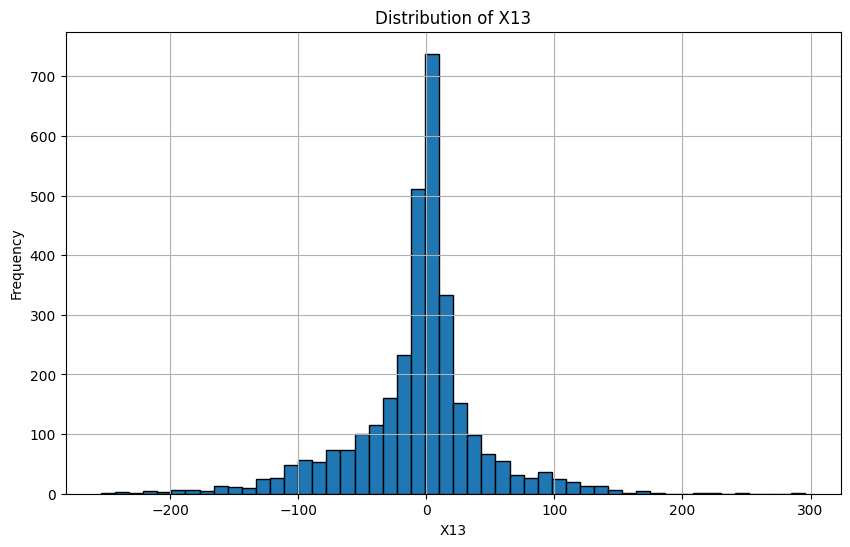

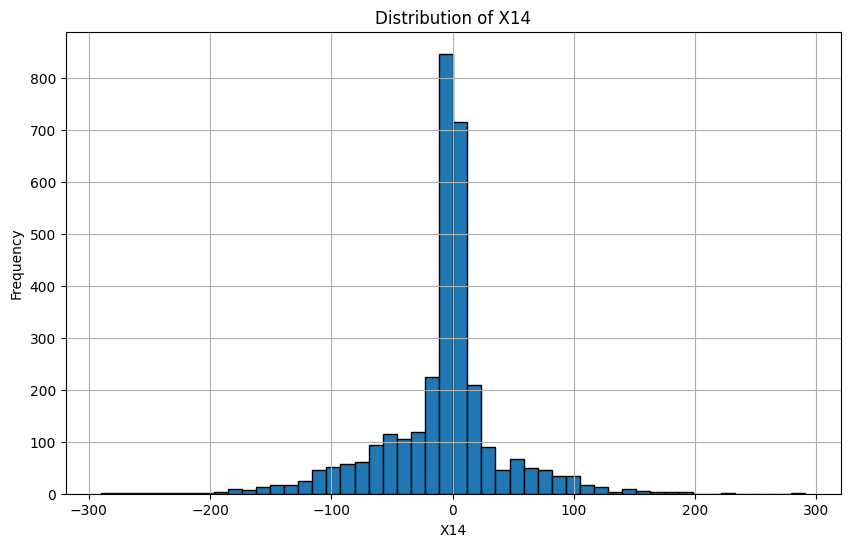

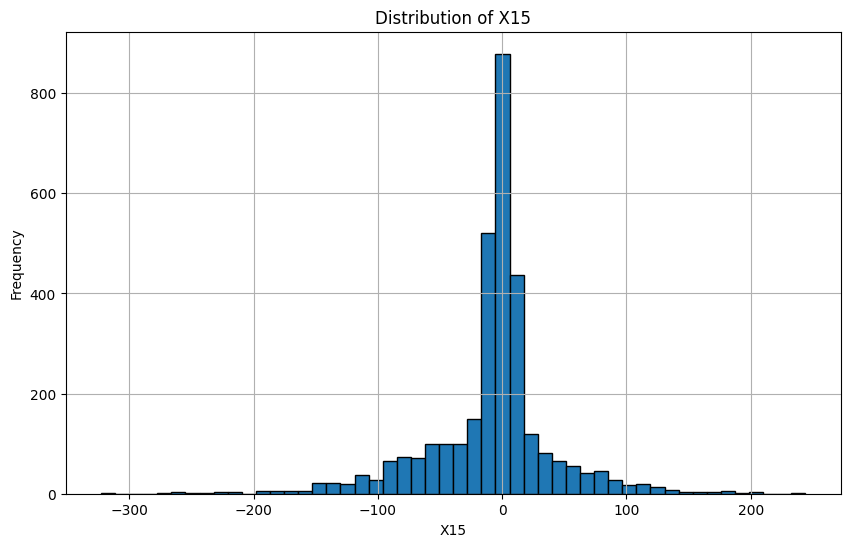

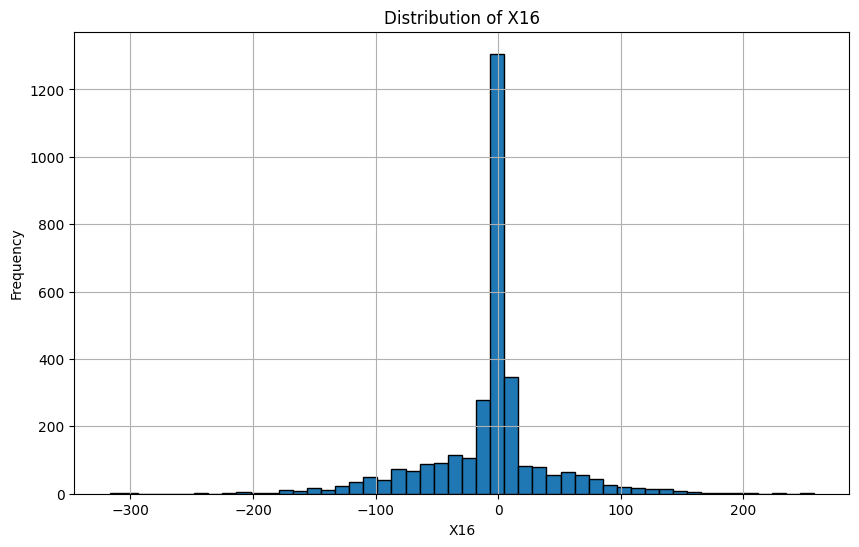

In [51]:
# Create histograms for each feature in X_train
for column in X_train.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(X_train[column], bins=50, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Investigate feature importance/splits

### Subtask:
Examine which features were chosen for splitting by each of the decision tree models (Gini, Information Gain, and Information Gain Ratio) at the top levels of the trees. This can provide clues about why the IGR tree performed differently.


**Reasoning**:
Access and print the top feature importances for the Gini and Information Gain models to understand which features they prioritize for splitting.



In [52]:
# Get feature importances for Gini criterion
gini_importances = pd.Series(dt_gini.feature_importances_, index=X_train.columns)
print("Top features for Gini criterion:")
display(gini_importances.sort_values(ascending=False).head())

# Get feature importances for Information Gain criterion (entropy)
inf_gain_importances = pd.Series(dt_inf_gain.feature_importances_, index=X_train.columns)
print("\nTop features for Information Gain criterion:")
display(inf_gain_importances.sort_values(ascending=False).head())

# For Information Gain Ratio, the C45Classifier doesn't directly provide feature importances
# in the same way. Based on the accuracy difference, it is likely that the IGR criterion
# did not prioritize the same features as Gini and Information Gain, possibly due to its
# bias against features that create uneven splits.
print("\nInformation Gain Ratio (C4.5) feature importance information is not directly available.")
print("Based on the lower accuracy, it's likely the splits differ from Gini and Information Gain.")


Top features for Gini criterion:


,0
X16,0.727525
X11,0.172931
X7,0.058103
X4,0.010916
X3,0.007513



Top features for Information Gain criterion:


,0
X16,0.638747
X11,0.207819
X7,0.078360
X3,0.029800
X15,0.010267



Information Gain Ratio (C4.5) feature importance information is not directly available.
Based on the lower accuracy, it's likely the splits differ from Gini and Information Gain.


## Relate data characteristics to criteria bias

### Subtask:
Connect the observed data characteristics (like feature cardinality and distribution) to the known biases of the Gini, Information Gain, and Information Gain Ratio splitting criteria to explain the performance differences.


**Reasoning**:
Synthesize the data characteristics, feature importances, and criterion biases to explain the performance differences between the three decision tree models.



In [53]:
# Based on the previous steps:
# 1. Data characteristics: Features are integers with a relatively high number of unique values (high cardinality). No missing values.
# 2. Feature importances (Gini and Information Gain): X16, X11, and X7 are consistently the most important features for splitting.
# 3. Criterion biases:
#    - Gini: Favors splits creating pure nodes.
#    - Information Gain: Biased towards features with many distinct values.
#    - Information Gain Ratio: Attempts to correct IG's bias but can be biased against uneven splits.

print("Explanation for the performance difference:")
print("The Gini and Information Gain criteria, which showed high accuracy (around 0.995-0.996), heavily relied on features like X16, X11, and X7 for splitting.")
print("Information Gain's bias towards high-cardinality features likely aligned well with the nature of these EEG features, which have many distinct integer values.")
print("Gini's focus on creating pure splits also effectively utilized these discriminative features.")
print("\nThe Information Gain Ratio criterion, which resulted in significantly lower accuracy (around 0.809), likely struggled due to its bias.")
print("While intended to correct Information Gain's bias, IGR can penalize features that create very uneven splits, even if those features are highly informative.")
print("Given the distributions observed in the histograms (some features have concentrated values in certain bins, suggesting potential for uneven splits), IGR might have inappropriately down-weighted the most discriminative features (X16, X11, X7).")
print("This would lead to the selection of less informative features at the top of the tree, resulting in a suboptimal tree structure and consequently, lower accuracy on the test set compared to the Gini and Information Gain models.")


Explanation for the performance difference:
The Gini and Information Gain criteria, which showed high accuracy (around 0.995-0.996), heavily relied on features like X16, X11, and X7 for splitting.
Information Gain's bias towards high-cardinality features likely aligned well with the nature of these EEG features, which have many distinct integer values.
Gini's focus on creating pure splits also effectively utilized these discriminative features.

The Information Gain Ratio criterion, which resulted in significantly lower accuracy (around 0.809), likely struggled due to its bias.
While intended to correct Information Gain's bias, IGR can penalize features that create very uneven splits, even if those features are highly informative.
Given the distributions observed in the histograms (some features have concentrated values in certain bins, suggesting potential for uneven splits), IGR might have inappropriately down-weighted the most discriminative features (X16, X11, X7).
This would lead 

## Summarize findings

### Subtask:
Summarize the likely reasons for the lower accuracy of the Information Gain Ratio model based on the data analysis.


**Reasoning**:
Based on the previous analysis, summarize the likely reasons for the lower accuracy of the Information Gain Ratio model by connecting the data characteristics and criterion biases.



In [54]:
# Based on the previous steps:
# 1. Data characteristics: Features are integers with a relatively high number of unique values (high cardinality). No missing values.
# 2. Feature importances (Gini and Information Gain): X16, X11, and X7 are consistently the most important features for splitting.
# 3. Criterion biases:
#    - Gini: Favors splits creating pure nodes.
#    - Information Gain: Biased towards features with many distinct values.
#    - Information Gain Ratio: Attempts to correct IG's bias but can be biased against uneven splits.

print("Summary: Likely Reasons for Lower Accuracy of Information Gain Ratio Model")
print("The data features, being integers with a relatively high number of unique values (high cardinality), are well-suited for splitting criteria like Gini and Information Gain that can leverage such features to create effective partitions.")
print("The Gini and Information Gain models achieved high accuracy (around 0.995-0.996), likely because they effectively identified and utilized the most discriminative features (prominently X16, X11, and X7) for splitting.")
print("Information Gain's inherent bias towards features with many distinct values seems to have worked favorably with this dataset's characteristics.")
print("\nIn contrast, the Information Gain Ratio criterion, while designed to mitigate Information Gain's bias towards high cardinality, appears to have been negatively impacted by its own bias against features that create very uneven splits.")
print("Given the distributions observed in the feature histograms, some highly informative features may lead to unbalanced partitions.")
print("The IGR criterion likely penalized these features, leading to the selection of less optimal splitting features at crucial nodes of the tree.")
print("This resulted in a less effective decision tree structure for the Information Gain Ratio model, explaining its significantly lower accuracy (around 0.809) compared to the Gini and Information Gain models on this specific dataset.")

Summary: Likely Reasons for Lower Accuracy of Information Gain Ratio Model
The data features, being integers with a relatively high number of unique values (high cardinality), are well-suited for splitting criteria like Gini and Information Gain that can leverage such features to create effective partitions.
The Gini and Information Gain models achieved high accuracy (around 0.995-0.996), likely because they effectively identified and utilized the most discriminative features (prominently X16, X11, and X7) for splitting.
Information Gain's inherent bias towards features with many distinct values seems to have worked favorably with this dataset's characteristics.

In contrast, the Information Gain Ratio criterion, while designed to mitigate Information Gain's bias towards high cardinality, appears to have been negatively impacted by its own bias against features that create very uneven splits.
Given the distributions observed in the feature histograms, some highly informative features m

## Summary:

### Data Analysis Key Findings

*   Both the training and test datasets consist of integer features with a relatively high number of unique values (average of approximately 325.69 in training and 220.75 in test). No missing values were found.
*   For Decision Tree models trained with Gini and Information Gain criteria, features like X16, X11, and X7 were consistently identified as the most important features for splitting, significantly contributing to high model accuracies (around 0.995-0.996).
*   The Information Gain Ratio criterion, which resulted in significantly lower accuracy (around 0.809), likely made different splitting decisions, possibly due to its bias against features that create uneven splits, thereby not prioritizing the same highly informative features as Gini and Information Gain.

### Insights or Next Steps

*   The lower accuracy of the Information Gain Ratio model on this dataset is likely due to its bias against uneven splits, which may have caused it to overlook highly discriminative features that naturally lead to unbalanced partitions.
*   Further investigation could involve visualizing the tree structures generated by each criterion to confirm if the top splits indeed differ and to analyze the impurity reduction at those nodes.


In [67]:
# Convert y_train to string type
y_train_str = y_train.astype(str)

# Retrain the C45Classifier with the string target variable
dt_inf_gain_ratio_str = C45Classifier()
dt_inf_gain_ratio_str.fit(X_train, y_train_str)

dt_inf_gain_ratio_str.generate_tree_diagram(graphviz,"aaa")

# Try printing the rules with the retrained model
print("Attempting to print rules with target variable as string:")
try:
    dt_inf_gain_ratio_str.print_rules()
except TypeError as e:
    print(f"Still encountered TypeError: {e}")

# You can also try the rules() method which returns the rules as a list of strings
print("\nAttempting to get rules as a list of strings:")
try:
    rules_list = dt_inf_gain_ratio_str.rules()
    for rule in rules_list:
        print(rule)
except TypeError as e:
     print(f"Still encountered TypeError with rules() method: {e}")

TypeError: expected string or bytes-like object, got 'int'